# 워드 클라우드

## word cloud 설치 : pip install wordcloud

In [263]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import nltk
warnings.filterwarnings("ignore")
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

## Alice in Wonderland

In [271]:
text = open('data/21_alice.txt').read()
alice_mask = np.array(Image.open('data/21_alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [272]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

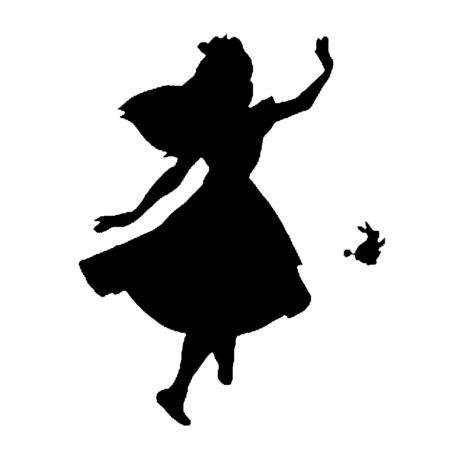

In [273]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [274]:
type(text)

str

In [141]:
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [280]:
text_[0]

'STAR'

In [142]:
wc = WordCloud(stopwords = stopwords, background_color='black', max_words=2000,
               mask=alice_mask)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.25956284153005466,
 'know': 0.2459016393442623,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'now': 0.16393442622950818,
 'went': 0.15846994535519127,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'well': 0.14754098360655737,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'head': 0.13114754098360656,
 'What': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11

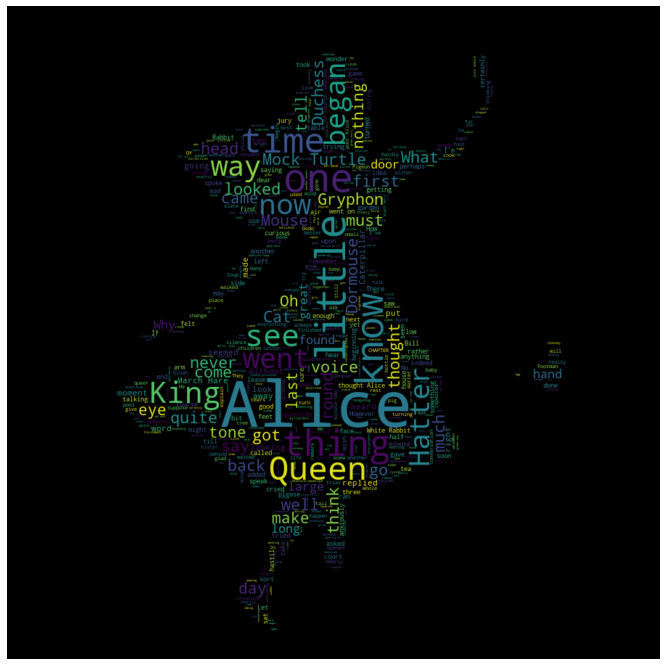

In [143]:
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [148]:
text = open('data/21_a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/21_stormtrooper_mask.png'))

In [149]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [150]:
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [151]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [152]:
import random
# 색조(hue), 포화(saturation), 밝기(lightness)
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [153]:
s = 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
s

'hsl(0, 0%, 73%)'

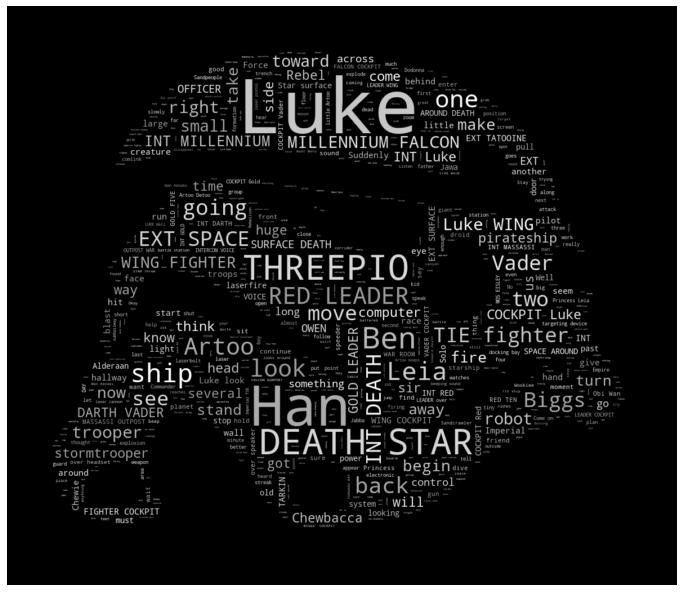

In [154]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 여자친구 선물 고르기

In [65]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [99]:
tmp1 = 'https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&'
html = tmp1 + 'query={key_word}&c_id=&c_name=&sm=tab_pge&kin_start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [101]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:10]

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  천여여친 선물 추   3일 전   천여여친 선물 추   답변 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.naver.com 하바리움 고객후기를 인스타에 많이 올려놨더라구요 한번...    닉네임gnsr****   ',
 '  질문  여친선물로 뭘 줘야 할까요?   2020.05.21.   여친선물로 뭘 줘야 할까요?   답변 안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이 돌 수 있는 목걸이,반지...    닉네임Shine09749 블로그   ',
 '  질문  아빠가 어제 카드 주셔서 여친 선물   2020.02.04.   아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면...   답변 제가 보기에는 여친이 너무 무리하게 요구하는것 같은데 무리해서도라도 사주고 싶은 건가요? 남친을 곤란하게 만드는 여친이라면 고민해 보셔야할듯 해요~사랑은 둘이...    닉네임후니맘   ',
 '  질문  여우님!! 정품문의 답변즘여 여친선물인데....   2020.01.29.   셀렉온에서 구매했으며 EATTREND에서 물품 배송되었어요. 메종 마르지엘라 5AC 미니백 부탁드립니다. 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다.   답변 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요;    닉네임은빛여우   ',
 '  질

In [195]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        line_str = line.text.replace('\n','').replace('\t','')
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [196]:
present_candi_text[2:30]

['  질문  여자친구 선물해주려구요   2020.06.03.   여자친구가 첨으로 독립을 하게되서 축하기념으로 선물하려하는데요 여자친구 선물은 서프라이즈로 하고픈데 화장품이나 악세사리같은거는 제가 잘모르기도 하고 여자친구...   답변 여자친구 선물로 좀 특별한걸 선물해주세요 보면 생각이 자주나는걸로요 ㅎㅎ 아무래도 지속적이면서도 오래쓸수있는거겠죠 화장품은 소비성이니 비추천드려요!    닉네임jinwoo23   ',
 '  질문  20대여자친구선물 하카 전자담배 어떨까요?   7일 전   전자담배 사주려고요 제가 선물고르는 센스가 좀 없어서 여기에 물어봅니다. 전자담배 중에 20대여자친구선물로 줄만한 것 찾고 있는데 하카 전자담배는 어떨지 궁금합니다.   답변 안녕하세요 20대여자친구선물 하카 전자담배는 어떤지 고민중이시군요! 여자친구분의 건강을 위해서라도 바꾸어주는것이 좋겠네요    닉네임sweryui   ',
 '  질문  여자친구 선물 추천 부탁드립니다.(목걸이)   2020.06.06.   안녕하세요 여자친구 선물로 목걸이를 선물하고 싶어서 이렇게 글을 올립니다. 제가 쥬얼리 쪽은 브랜드가 어떻게 되어 있는지 잘 몰라서요. 20대 중반 저랑 동갑인...   답변 14K 18k 1부 2부 3부 다이아 큐빅 프러포즈 데일리 목걸이 : 샤밍 주얼리 [샤밍주얼리] 14K 18k 1부 & 2부 3부 다이아 or 큐빅 프러포즈 데일리 목걸이 (우신, 현대...    닉네임샤밍제이   ',
 '  질문  여자친구 선물 추천 부탁드려요~   2020.01.20.   저기요...여자친구 선물 추천 좀 해 주세요~ 너무 부담스럽지 않은 가벼운 종류로 찾고... 없이 좋아하면서도 실용적인 그런 종류로 괜찮은 여자친구 선물 추천 부탁드립니다~   답변 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨... 같아서 여자친구 선물 추천으로 딱인 것 같아요~~ 저도... 역시 여자친구 선물 추천이라고 하면 꽃!! 하지만 진짜...    닉네임hm8h****   ',
 "  질

In [197]:
len(present_candi_text)

1300

In [198]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [199]:
with open("data/21_present_candi.txt", "w", -1, 'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [200]:
okt = Okt()

In [201]:
gifts = okt.nouns(present_text)
gifts[:20]

['기본',
 '검색',
 '입력',
 '단어',
 '하나',
 '이상',
 '포함',
 '문서',
 '검색',
 '상세',
 '검색',
 '일치',
 '단어',
 '문장',
 '반드시',
 '포함',
 '단어',
 '제외',
 '단어',
 '검색']

In [202]:
gifts = nltk.Text(gifts, name='여자 친구 선물')
print(len(gifts.tokens))
print(len(set(gifts.tokens)))

38420
2879


In [203]:
gifts.vocab().most_common(100)

[('선물', 4384),
 ('여자친구', 3627),
 ('질문', 1077),
 ('추천', 1077),
 ('답변', 1069),
 ('닉네임', 908),
 ('목걸이', 514),
 ('단어', 500),
 ('여자', 499),
 ('검색', 439),
 ('좀', 408),
 ('때', 388),
 ('제', 336),
 ('생일', 323),
 ('요', 318),
 ('입력', 300),
 ('뭐', 299),
 ('화장품', 282),
 ('저', 235),
 ('것', 219),
 ('포함', 208),
 ('거', 208),
 ('하나', 206),
 ('생각', 202),
 ('고민', 200),
 ('연관검색어', 200),
 ('향수', 174),
 ('걸', 158),
 ('가격', 156),
 ('로', 135),
 ('에센스', 132),
 ('사용', 131),
 ('개', 126),
 ('뭘', 123),
 ('후', 120),
 ('중', 118),
 ('뷰티', 113),
 ('구분', 112),
 ('크리스마스', 112),
 ('스킨', 111),
 ('이번', 111),
 ('브랜드', 108),
 ('기본', 107),
 ('이상', 107),
 ('지갑', 107),
 ('운동', 105),
 ('살', 105),
 ('제외', 104),
 ('다시', 104),
 ('범위', 101),
 ('디바이스', 101),
 ('유지', 101),
 ('문서', 100),
 ('상세', 100),
 ('일치', 100),
 ('문장', 100),
 ('반드시', 100),
 ('결과', 100),
 ('쉼표', 100),
 ('도움말', 100),
 ('케어', 100),
 ('스킨로션', 100),
 ('근력', 100),
 ('일간', 100),
 ('열기', 100),
 ('용', 99),
 ('꽃', 96),
 ('제품', 93),
 ('여친', 89),
 ('화이트데이', 89),
 ('이벤트', 85),
 

In [262]:
sw_text = ' '.join([str(elem) for elem in set(gifts.tokens)])
print(sw_text)

달반 남편 펜션 명안 장보 두보 컬 라떼 낼 발렌시아 사주면 넌 응원 사실 방학동 호루라기 형 거리 유행 아시 회원 에쎈스 메세지 눈꽃 구두 김유진 밀튼스텔리 편의점 쇼퍼 이용 메신저백 실상 금주 데메테르 겸 갠찮 디어 제이콥 김유성 안타 사본 플라워 라이프 기념품 백금 애프터 커피 손편지 화 히로 유씨 듀 결론 영상 제중 어스 감기 스뮤 플레밍 리뷰 정햇 주말 치 해리 순위 소개 값 세상 꽃집 첫 과외 류량 작약 애비뉴 비타민 알콜 삶 선 등등 설정 한선 도넛 선생님 하바 빵좀 입학 곰인형 양질 방향 쨥탱 안산 베스트셀러 런닝맨 가로수길 땐 상품 어쩌 가시 토피 본적 미래 용감 일병 세제 기념 프라 럼 리좀 식사 닝 제입 대별 만원 꼬리 무었 힐 축하 무드등 커플목도리 천연 평생 백 장거리 코드 그리스 톱니바퀴 무드미 발찌 대입 방문 녹음기 주황 나름 상품권 애 터미널 로드 업데이트 작고 디올 고지 조각 퓨저 주세영 문제 점점 모든 과도 나 픽 매일 퀼리티 저가 육아 면서 불면 호신용품 살때 파우치 로더 성년 막 최 시마 현대 사이트 고려 탁상 헤라 시구 랍니 복용 예 공급 대의 자몽 잡고 삼십 에브리데이 다이어트 상대 가슴 주니 색상 사절 영국 여친 벌써 한국 휴가 오브 오렌지 굿 방도 핸드 러스트 우리나라 무난 컴터 연화 몇 컬러 볼륨 유학 고심 그림 빼뺴 슬리퍼 걸그룹 지퍼 서포터즈 사 인테리어 메뉴인 아이패드 세럼 향수 유블리 낙엽 요청 만난 겄좀 이군 런던 내면 종로 유색 언제 소속사 옥스 부적 페이크 지번 무스 밈주 비갑 피어리 노 절대 잠깐 곤약 존경 남 똘똘이 놀이터 간 일찍 클래스 제도 마지막 삿 신은정 방수 덩 끼 오라 튤립 의뢰 양제 비바 투자 초콜 창 드라마 연령 팀 갑자기 공 미술 버스 동안 자첼백 제조 프렌즈 그날 손 코덕 일지 티셔츠 전역 인화 할머니 내공 사탕 바크 답니 건가 다른 스튜디오 트렌디 겨우 출시 산물 크레파스 어서 쇼핑몰 국적 벽 오븐 종류 연수구 직조 괜찮쥬 활동 미리 뽀로로 마자 그간 세기 도구 초콜릿선물 존버 로

In [226]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','인','선물',
              '좋','1','는','로','으로','2','것','은','다',',','니다','대','들','걸','해서',
              '2019','들','데','..','의','때','겠','고','게','네요','한','일','할','많이',
              '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ','알려',
              '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','좋은',
              '지','있','못','후','중','줄','6','과','어떤','기본','!!','!','??','입니다',
              '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','안',
              '2019.08','2019.09','100일','27','됩니다','너무','이런','괜찮은','저','검색',
              '해주고','적','안녕하세요','하기','연관검색어','싶은데','보','니까','거기','서',
              '합니다','좋을까요','기억','준비','하고','이번','아닐까','있는데요','2019.07',
              '건','주는','있으면','면','이나','해주세요','대한','해주면','살','된','때문',
              '남을만한','상세','정확히','일치','/','(',')','반드시','(+)','(-)','(,)',
              '반드시','기','결과','줄이고자','하실','여러','개','쉼표','하세요','고민',
              '여자친구','추천','****','^^','ㅠㅠ','에서','포함','30','이라','하는데','여자','생일',
              '가격','브랜드','크리스마스','뭘','사용','다시','제외','도움말','일간','곧','더','닉네임',
              '범위','구분','생각','입력','참고','분','감동','친구','유지','기념일','의미','커플','정말',
              '지금','등','남자','중반','날','해','여성','부담','그','전','무엇','나이','그냥',
              '사람','일단','사려','처음','학생','지식인','인기','진짜']

In [237]:
gifts = [each_word for each_word in gifts 
                            if each_word not in stop_words]

gifts = nltk.Text(gifts, name='여자 친구 선물')
gifts.vocab().most_common(100)

[('목걸이', 514),
 ('화장품', 282),
 ('향수', 174),
 ('에센스', 132),
 ('뷰티', 113),
 ('스킨', 111),
 ('지갑', 107),
 ('운동', 105),
 ('디바이스', 101),
 ('문서', 100),
 ('문장', 100),
 ('케어', 100),
 ('스킨로션', 100),
 ('근력', 100),
 ('열기', 100),
 ('용', 99),
 ('꽃', 96),
 ('제품', 93),
 ('여친', 89),
 ('화이트데이', 89),
 ('이벤트', 85),
 ('요즘', 83),
 ('하트', 82),
 ('다이아', 76),
 ('귀걸이', 76),
 ('편지', 75),
 ('가방', 73),
 ('팔찌', 69),
 ('티니', 68),
 ('직접', 67),
 ('반지', 67),
 ('마음', 63),
 ('정도', 61),
 ('시계', 58),
 ('악세사리', 53),
 ('명품', 51),
 ('사진', 49),
 ('가지', 44),
 ('얼마', 43),
 ('돈', 42),
 ('옷', 41),
 ('피부', 41),
 ('달', 41),
 ('라면', 41),
 ('초반', 41),
 ('가장', 41),
 ('장미', 40),
 ('조금', 40),
 ('위', 39),
 ('향', 39),
 ('말', 39),
 ('손편지', 39),
 ('이름', 38),
 ('센스', 37),
 ('세트', 37),
 ('부탁', 37),
 ('항상', 37),
 ('립스틱', 37),
 ('틴트', 37),
 ('꼭', 36),
 ('디자인', 35),
 ('한번', 35),
 ('도움', 34),
 ('평소', 34),
 ('대학생', 34),
 ('가죽', 34),
 ('향기', 33),
 ('이제', 33),
 ('혹시', 32),
 ('내공', 31),
 ('샤넬', 31),
 ('입생로랑', 31),
 ('인형', 31),
 ('정성', 30),
 ('신발', 30)

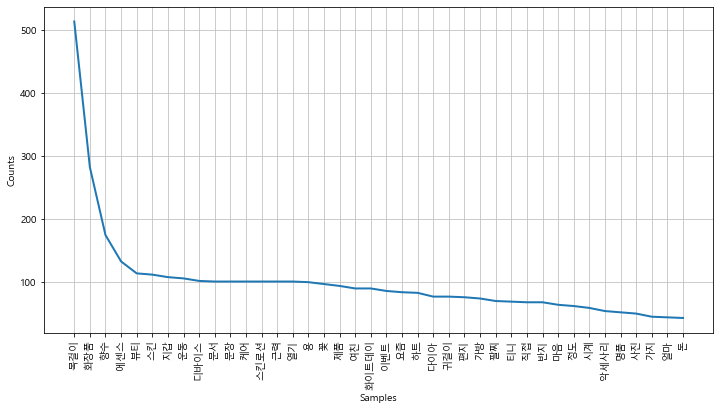

In [228]:
plt.figure(figsize=(12,6))
gifts.plot(40) 
plt.show()

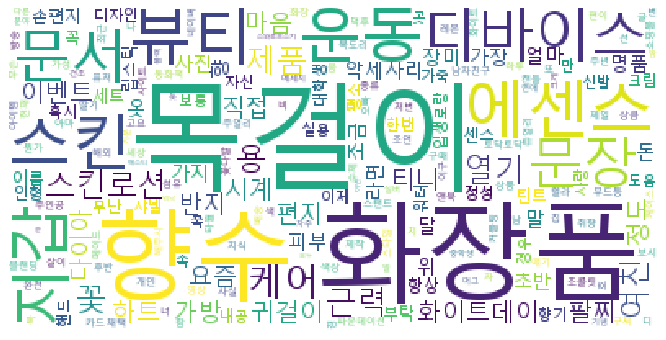

In [236]:
data = gifts.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [231]:
mask = np.array(Image.open('data/21_heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [234]:
data = gifts.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

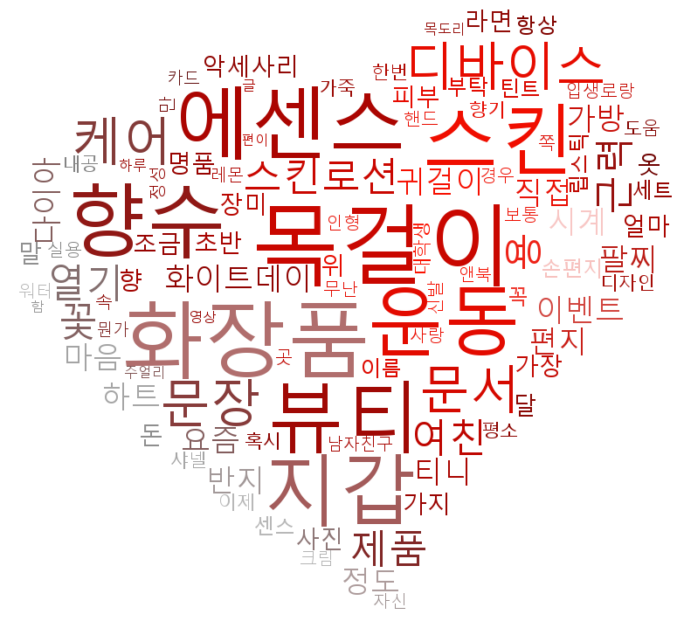

In [235]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()